Installing Dependencies

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

Matches shape: (1095, 20)
Deliveries shape: (260920, 17)


In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [8]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [9]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [10]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [11]:
merged_df = deliveries.merge(matches,how='left',left_on='match_id',right_on='id')

In [12]:
merged_df.shape

(260920, 37)

In [13]:
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [ ]:

print(merged_df.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date',
       'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'method', 'umpire1',
       'umpire2'],
      dtype='object')


In [15]:
def all_teams():
    temp = pd.concat([matches['team1'],matches['team2']]).unique()
    return {"teams":temp}
all_teams()


{'teams': array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
        'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Gujarat Lions', 'Rising Pune Supergiants',
        'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
        'Lucknow Super Giants', 'Gujarat Titans',
        'Royal Challengers Bengaluru'], dtype=object)}

In [16]:
def all_players():
    temp = pd.concat([deliveries['batter'],deliveries['bowler']]).unique()
    return {"players":temp}

In [17]:
all_players()

{'players': array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
        'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
        'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
        'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
        'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
        'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
        'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
        'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
        'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
        'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
        'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
        'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
        'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
        'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
        'DPMD Jayawardene', '

Analyze Team Performance

C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\366489317.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")


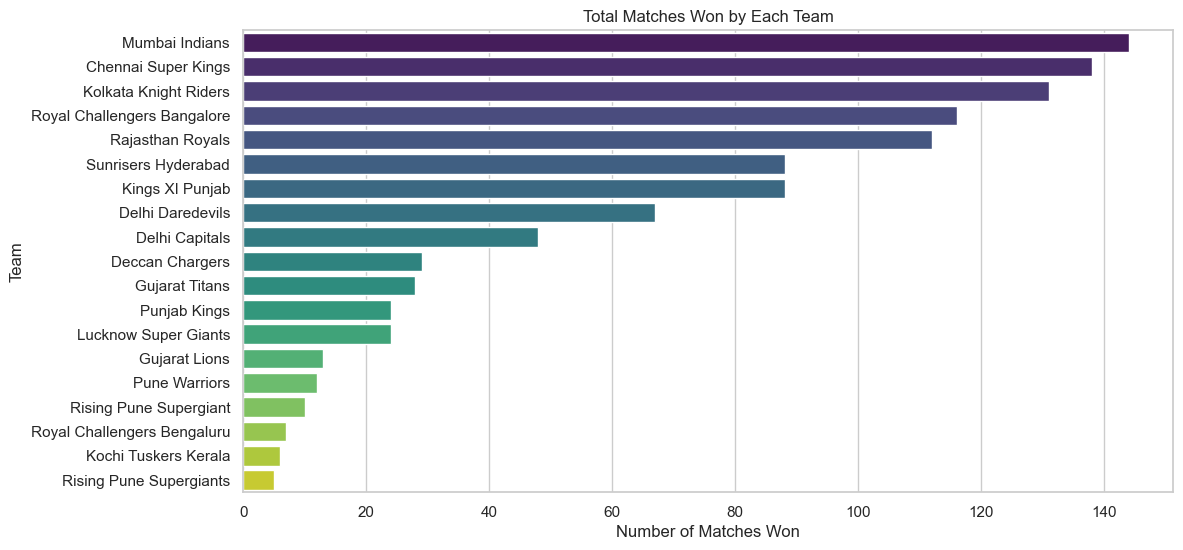

In [ ]:
# Analyze number of matches won by each team and plot

# Count matches won by each team
team_wins = matches['winner'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")
plt.xlabel("Number of Matches Won")
plt.ylabel("Team")
plt.title("Total Matches Won by Each Team")
plt.show()


Final matches won by each team:
winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\2872473642.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=finals_won.values, y=finals_won.index, palette="magma")


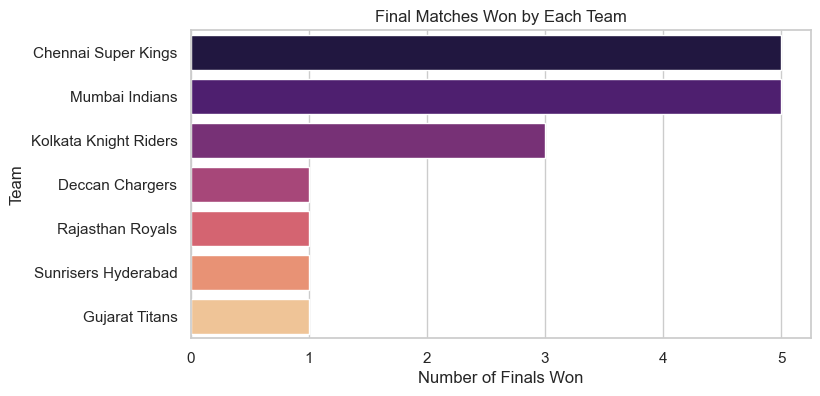

In [19]:
# Find the number of final matches won by each team

# Filter only final matches
finals = matches[matches['match_type'].str.lower() == 'final']

# Count finals won by each team
finals_won = finals['winner'].value_counts()

# Display results
print("Final matches won by each team:")
print(finals_won)

# Optional: Plot
plt.figure(figsize=(8,4))
sns.barplot(x=finals_won.values, y=finals_won.index, palette="magma")
plt.xlabel("Number of Finals Won")
plt.ylabel("Team")
plt.title("Final Matches Won by Each Team")
plt.show()

Analyze Player Performance individually

Top 10 Run Scorers:
batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\2703731767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="crest")


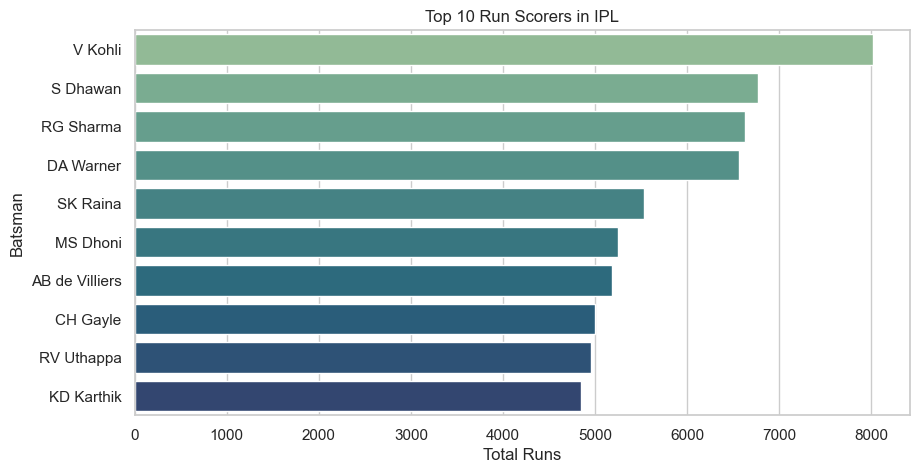

Top 10 Wicket Takers:
bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
R Ashwin      180
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: is_wicket, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\2703731767.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="flare")


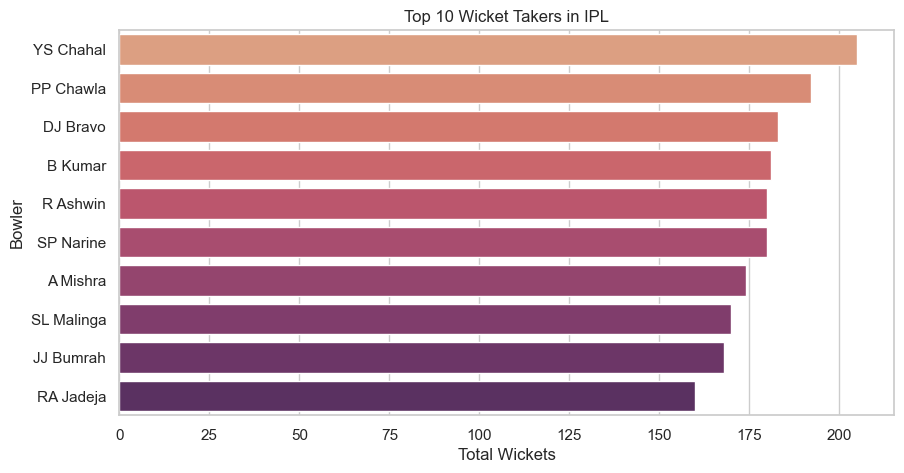

In [20]:
# Analyze Player Performance

# Top Run Scorers
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Run Scorers:")
print(top_batsmen)

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="crest")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 10 Run Scorers in IPL")
plt.show()

# Top Wicket Takers
# Only count valid wickets (exclude run outs and retired hurt)
valid_wickets = deliveries[deliveries['dismissal_kind'].isin([
    'bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'
])]
top_bowlers = valid_wickets.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
print("Top 10 Wicket Takers:")
print(top_bowlers)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="flare")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 10 Wicket Takers in IPL")
plt.show()

Analysis of Toss and Match Results

Toss winner also won the match in 50.59% of matches.

Toss Decision Counts:
toss_decision
field    704
bat      391
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\1359556346.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette="pastel")


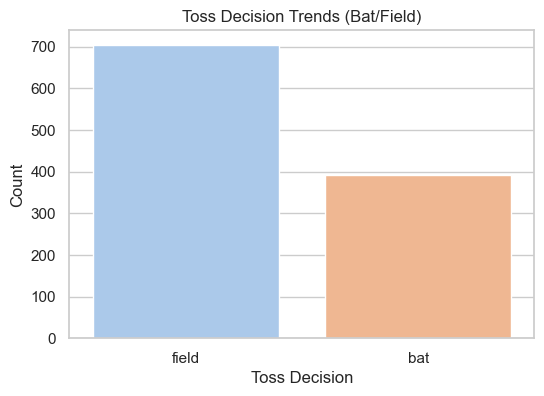

In [21]:
# Toss and Match Results Analysis

# 1. How often does the toss winner win the match?
toss_and_match_winner = matches[matches['toss_winner'] == matches['winner']]
toss_win_pct = len(toss_and_match_winner) / len(matches) * 100
print(f"Toss winner also won the match in {toss_win_pct:.2f}% of matches.")

# 2. Analyze toss decision trends (bat/field)
toss_decision_counts = matches['toss_decision'].value_counts()
print("\nToss Decision Counts:")
print(toss_decision_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette="pastel")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decision Trends (Bat/Field)")
plt.show()

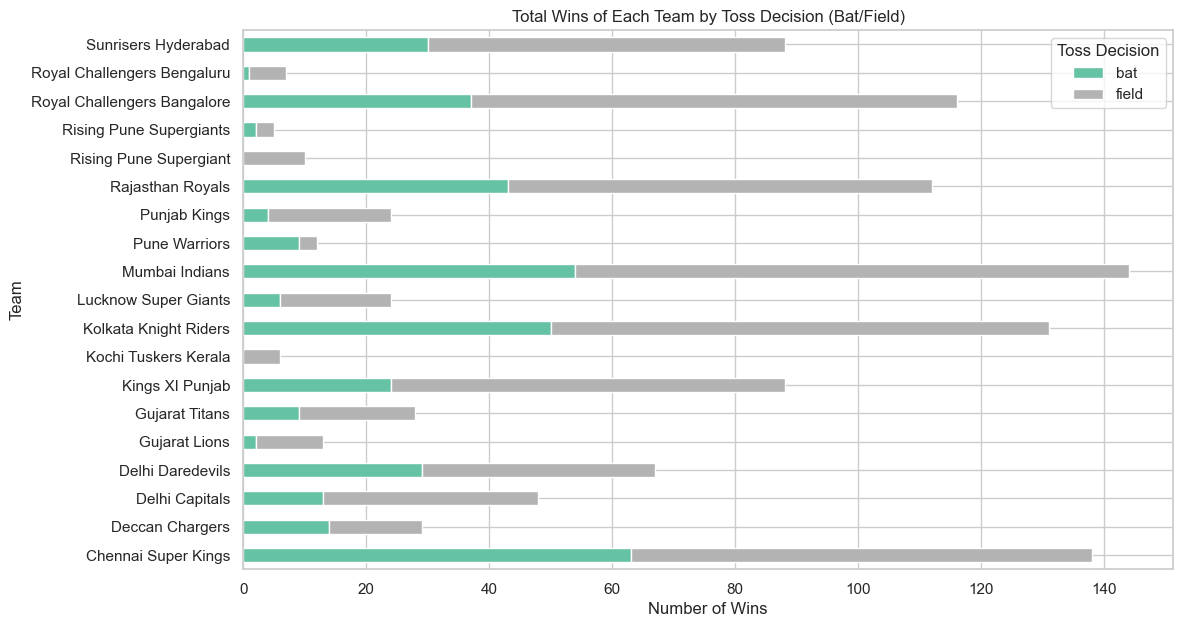

In [22]:
# Analyze total wins of each team by toss decision (bat/field)

# Filter out matches with no result or no winner
valid_matches = matches.dropna(subset=['winner', 'toss_decision'])

# Group by winner and toss_decision, then count
win_decision = valid_matches.groupby(['winner', 'toss_decision']).size().unstack(fill_value=0)

# Plot
win_decision.plot(kind='barh', stacked=True, figsize=(12,7), colormap='Set2')
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.title("Total Wins of Each Team by Toss Decision (Bat/Field)")
plt.legend(title="Toss Decision")
plt.show()

In [37]:

# Standardize team names
team_name_map = {
    'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiants': 'Rising Pune Supergiants',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    
}

matches['winner'] = matches['winner'].replace(team_name_map)
matches['team1'] = matches['team1'].replace(team_name_map)
matches['team2'] = matches['team2'].replace(team_name_map)
matches['toss_winner'] = matches['toss_winner'].replace(team_name_map)




Total Wins of Each Team by Toss Decision (Bat/Field):
toss_decision                bat  field
winner                                 
Chennai Super Kings           63     75
Deccan Chargers               14     15
Delhi Capitals                13     35
Delhi Daredevils              29     38
Gujarat Lions                  2     11
Gujarat Titans                 9     19
Kings XI Punjab               24     64
Kochi Tuskers Kerala           0      6
Kolkata Knight Riders         50     81
Lucknow Super Giants           6     18
Mumbai Indians                54     90
Pune Warriors                  9      3
Punjab Kings                   4     20
Rajasthan Royals              43     69
Rising Pune Supergiants        2     13
Royal Challengers Bangalore   38     85
Sunrisers Hyderabad           30     58


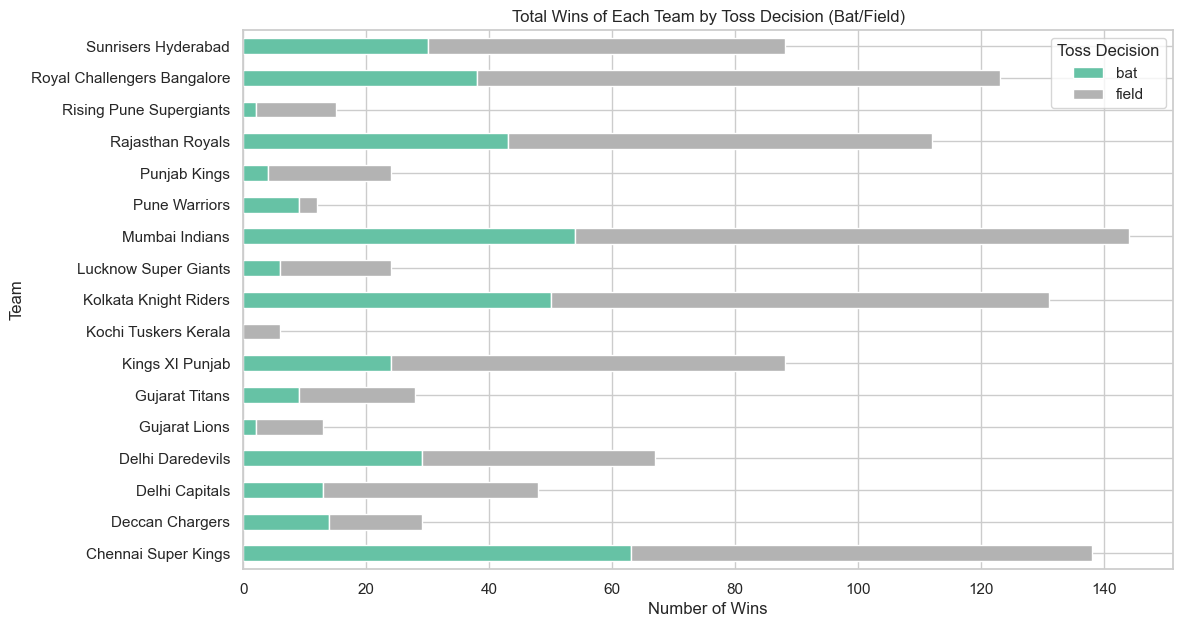

In [ ]:
# Analyze total wins of each team by toss decision (bat/field)

valid_matches = matches.dropna(subset=['winner', 'toss_decision'])

win_decision = valid_matches.groupby(['winner', 'toss_decision']).size().unstack(fill_value=0)
print("\nTotal Wins of Each Team by Toss Decision (Bat/Field):")
print(win_decision)

win_decision.plot(kind='barh', stacked=True, figsize=(12,7), colormap='Set2')
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.title("Total Wins of Each Team by Toss Decision (Bat/Field)")
plt.legend(title="Toss Decision")
plt.show()

Analysis by Venue and City

Top 10 Venues by Number of Matches Hosted:
venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\4173169657.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_counts.head(10).values, y=venue_counts.head(10).index, palette="Blues_r")


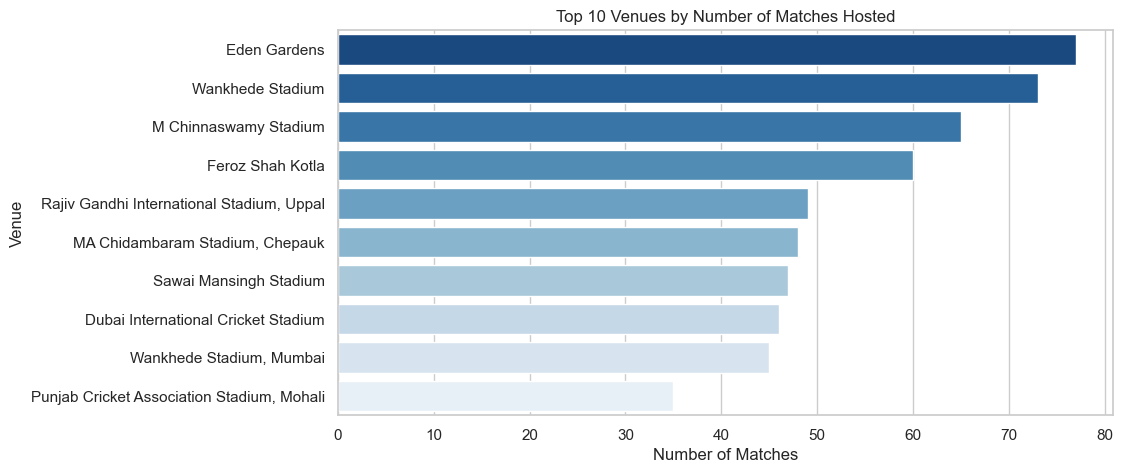


Top 10 Cities by Number of Matches Hosted:
city
Mumbai        173
Kolkata        93
Delhi          90
Chennai        85
Hyderabad      77
Bangalore      65
Chandigarh     61
Jaipur         57
Pune           51
Abu Dhabi      37
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\4173169657.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette="Greens_r")


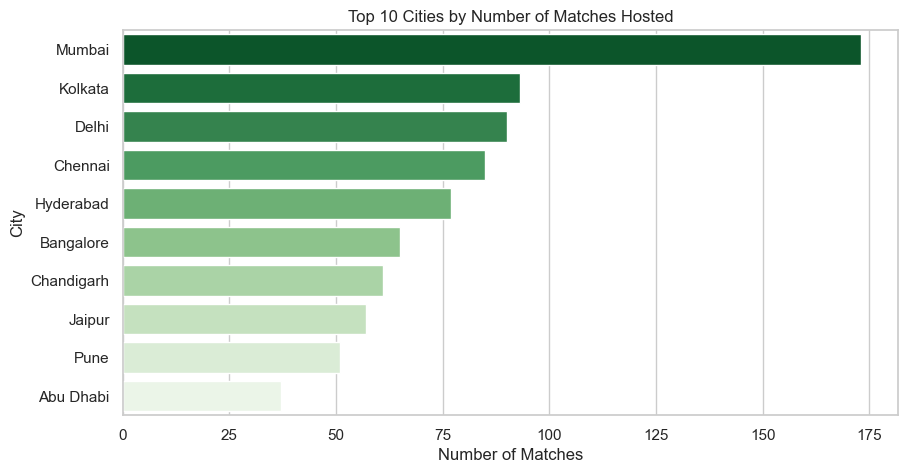


Teams with Most Wins at Their Home Ground (approximate):
winner
Mumbai Indians                 65
Kolkata Knight Riders          52
Chennai Super Kings            50
Rajasthan Royals               37
Sunrisers Hyderabad            36
Kings XI Punjab                30
Royal Challengers Bangalore    29
Delhi Daredevils               27
Delhi Capitals                 10
Gujarat Titans                  9
Name: home_win, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\4173169657.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_win_counts.head(10).values, y=home_win_counts.head(10).index, palette="Oranges_r")


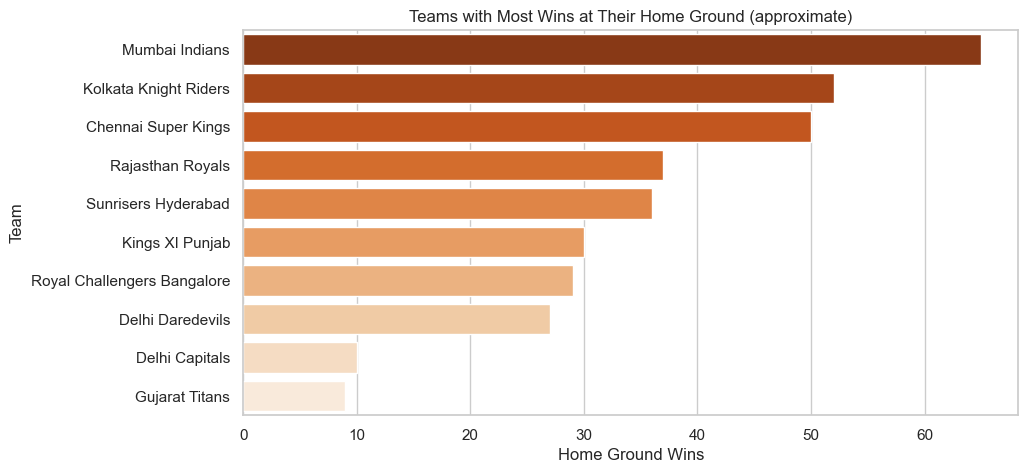

In [ ]:
# Venue and City Analysis

# 1. Which venues/cities host the most matches?
venue_counts = matches['venue'].value_counts()
city_counts = matches['city'].value_counts()

print("Top 10 Venues by Number of Matches Hosted:")
print(venue_counts.head(10))
plt.figure(figsize=(10,5))
sns.barplot(x=venue_counts.head(10).values, y=venue_counts.head(10).index, palette="Blues_r")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.title("Top 10 Venues by Number of Matches Hosted")
plt.show()

print("\nTop 10 Cities by Number of Matches Hosted:")
print(city_counts.head(10))
plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette="Greens_r")
plt.xlabel("Number of Matches")
plt.ylabel("City")
plt.title("Top 10 Cities by Number of Matches Hosted")
plt.show()

# 2. Team performance at different venues (home ground advantage)
# Home ground mapping is not directly available in the data.
# We make a simple assumption: if the city name is in the team name, it's a home match.

def is_home_match(row):
    team = row['winner']
    city = str(row['city']).lower()
    # Simple mapping for major teams (can be expanded)
    home_cities = {
        'Mumbai Indians': 'mumbai',
        'Chennai Super Kings': 'chennai',
        'Kolkata Knight Riders': 'kolkata',
        'Delhi Capitals': 'delhi',
        'Delhi Daredevils': 'delhi',
        'Royal Challengers Bangalore': 'bangalore',
        'Royal Challengers Bengaluru': 'bangalore',
        'Sunrisers Hyderabad': 'hyderabad',
        'Deccan Chargers': 'hyderabad',
        'Rajasthan Royals': 'jaipur',
        'Kings XI Punjab': 'chandigarh',
        'Punjab Kings': 'chandigarh',
        'Gujarat Titans': 'ahmedabad',
        'Gujarat Lions': 'rajkot',
        'Lucknow Super Giants': 'lucknow',
        'Pune Warriors': 'pune',
        'Rising Pune Supergiants': 'pune',
        'Rising Pune Supergiant': 'pune',
        'Kochi Tuskers Kerala': 'kochi'
    }
    return home_cities.get(team, '') in city

matches['home_win'] = matches.apply(is_home_match, axis=1)
home_win_counts = matches.groupby('winner')['home_win'].sum().sort_values(ascending=False)

print("\nTeams with Most Wins at Their Home Ground (approximate):")
print(home_win_counts.head(10))
plt.figure(figsize=(10,5))
sns.barplot(x=home_win_counts.head(10).values, y=home_win_counts.head(10).index, palette="Oranges_r")
plt.xlabel("Home Ground Wins")
plt.ylabel("Team")
plt.title("Teams with Most Wins at Their Home Ground (approximate)")
plt.show()

Analysis of Dismissal Types

Most Common Types of Dismissals:
dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\590571610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette="rocket")


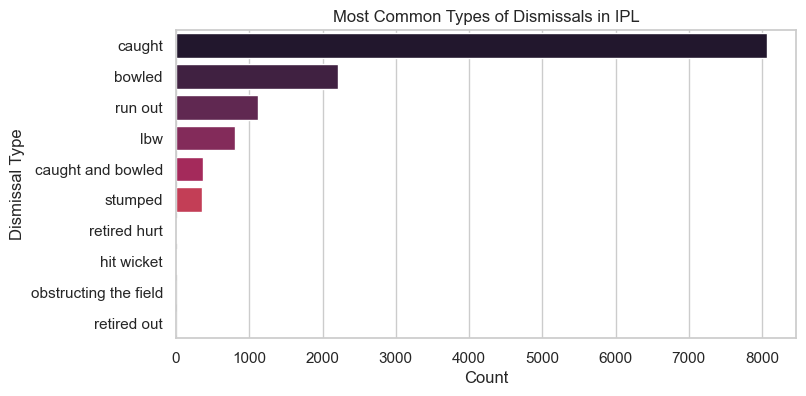


Players Dismissed Most Often:
player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\590571610.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_dismissed.values, y=most_dismissed.index, palette="mako")


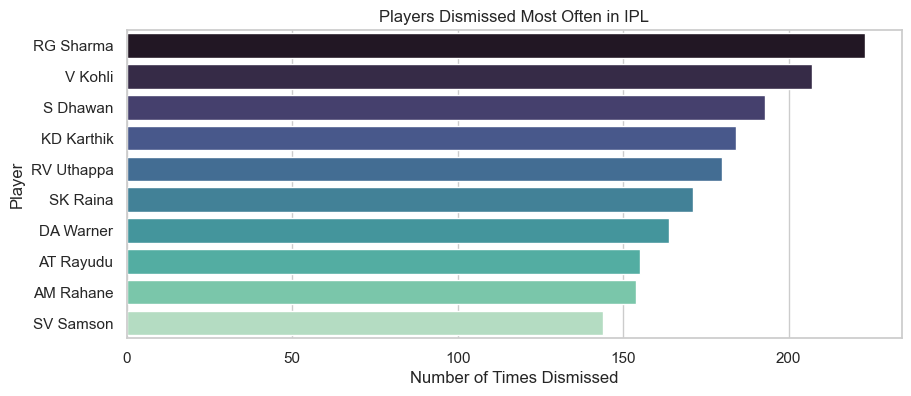

In [ ]:
# Dismissal Types Analysis

# 1.Most common types of dismissals
dismissal_counts = deliveries['dismissal_kind'].value_counts()
print("Most Common Types of Dismissals:")
print(dismissal_counts)

plt.figure(figsize=(8,4))
sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette="rocket")
plt.xlabel("Count")
plt.ylabel("Dismissal Type")
plt.title("Most Common Types of Dismissals in IPL")
plt.show()

# 2.Players with most dismissals (dismissed most often)
most_dismissed = deliveries['player_dismissed'].value_counts().head(10)
print("\nPlayers Dismissed Most Often:")
print(most_dismissed)

plt.figure(figsize=(10,4))
sns.barplot(x=most_dismissed.values, y=most_dismissed.index, palette="mako")
plt.xlabel("Number of Times Dismissed")
plt.ylabel("Player")
plt.title("Players Dismissed Most Often in IPL")
plt.show()

Comparison of bowler-batsman dismissal relationship

Top 10 Bowler-Batsman Dismissal Pairs:
               bowler player_dismissed  dismissal_count
8652        SP Narine        RG Sharma                8
161          A Mishra        RG Sharma                7
5484        MM Sharma        AT Rayudu                7
8931   Sandeep Sharma          V Kohli                7
6666          PP Ojha         MS Dhoni                7
7246        RA Jadeja       GJ Maxwell                7
6871         R Ashwin       RV Uthappa                7
10118          Z Khan         MS Dhoni                7
3679        JJ Bumrah          RR Pant                7
1193          B Kumar        AM Rahane                7


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\4240940225.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


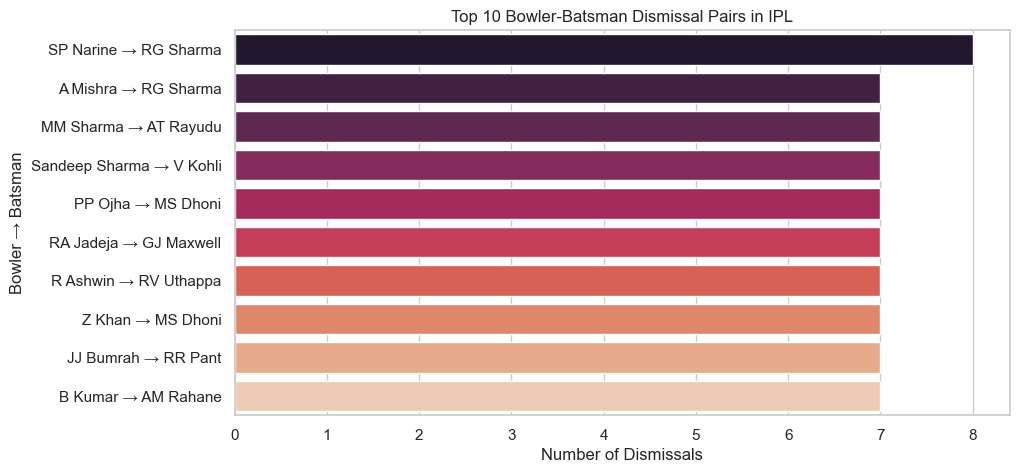

In [ ]:
# Analyze which players are dismissed by which bowlers (Top 10 pairs)

dismissals = deliveries.dropna(subset=['player_dismissed', 'bowler'])

bowler_batsman_dismissals = dismissals.groupby(['bowler', 'player_dismissed']).size().reset_index(name='dismissal_count')

# Sort by most frequent pairs
top_pairs = bowler_batsman_dismissals.sort_values('dismissal_count', ascending=False).head(10)

print("Top 10 Bowler-Batsman Dismissal Pairs:")
print(top_pairs)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_pairs,
    x='dismissal_count',
    y=top_pairs['bowler'] + " → " + top_pairs['player_dismissed'],
    palette="rocket"
)
plt.xlabel("Number of Dismissals")
plt.ylabel("Bowler → Batsman")
plt.title("Top 10 Bowler-Batsman Dismissal Pairs in IPL")
plt.show()

Clean the Season Date Format

In [ ]:
# Clean the season column (handles formats like '2007/08')
import re

def extract_season_year(season):
    # If season is like '2007/08', extract '08' and make it '2008'
    match = re.search(r'(\d{4})/(\d{2})', str(season))
    if match:
        return int('20' + match.group(2))
    # If season is just a year, return as int
    match = re.search(r'\d{4}', str(season))
    if match:
        return int(match.group(0))
    return None

matches['season'] = matches['season'].apply(extract_season_year)

Analysis of Season-wise trends 

Matches per Season:
season
2008     58
2009     57
2010     60
2011     73
2012     74
2013     76
2014     60
2015     59
2016     60
2017     59
2018     60
2019     60
2021    120
2022     74
2023     74
2024     71
Name: count, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\1855783431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette="cubehelix")


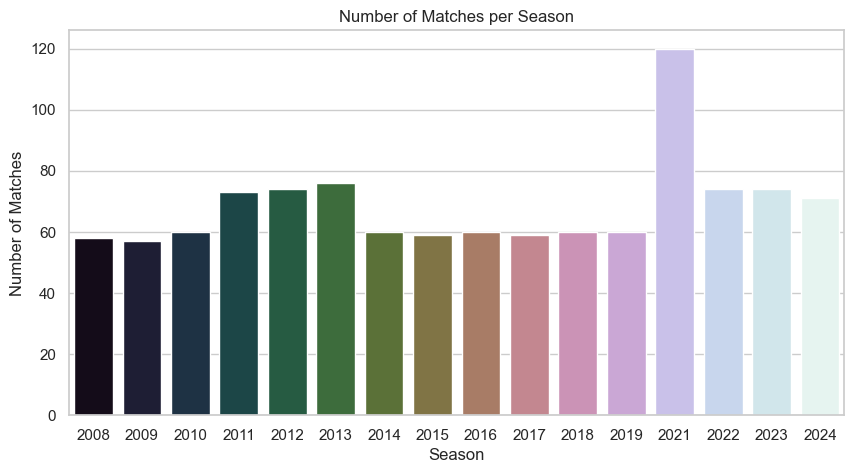


Total Runs per Season:
season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
2018    19901
2019    19434
2021    38053
2022    24395
2023    25688
2024    25971
Name: total_runs, dtype: int64


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\1855783431.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_per_season.index, y=runs_per_season.values, palette="YlOrRd")


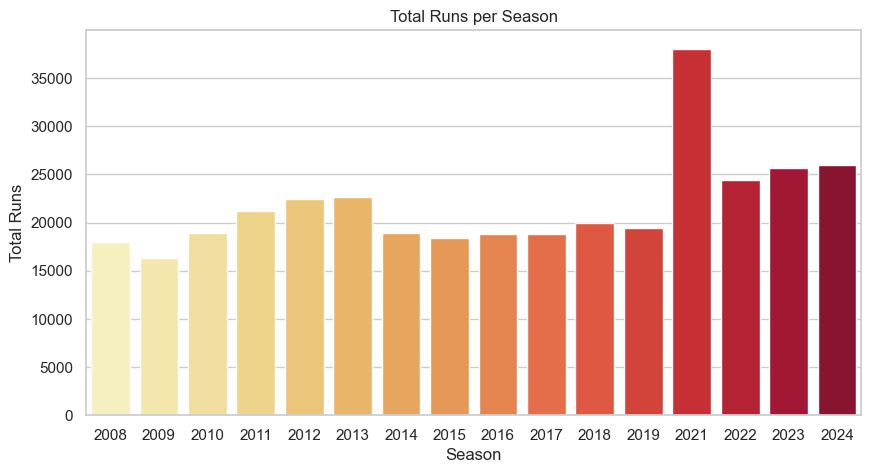

In [ ]:

# 1. Matches per season
matches_per_season = matches['season'].value_counts().sort_index()
print("Matches per Season:")
print(matches_per_season)

plt.figure(figsize=(10,5))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette="cubehelix")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Number of Matches per Season")
plt.show()

# 2. Runs per season
# Merge deliveries with matches to get season info for each delivery
deliveries_with_season = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')
runs_per_season = deliveries_with_season.groupby('season')['total_runs'].sum().sort_index()
print("\nTotal Runs per Season:")
print(runs_per_season)

plt.figure(figsize=(10,5))
sns.barplot(x=runs_per_season.index, y=runs_per_season.values, palette="YlOrRd")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.title("Total Runs per Season")
plt.show()

Team vs Team Analysis

Team vs Team Win Matrix (number of times row team beat column team):


,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
Chennai Super Kings,0,6,7,12,0,3,14,1,19,1,17,4,2,16,0,0,20,1,15
Deccan Chargers,4,0,0,4,0,0,3,1,2,0,4,3,0,2,0,0,6,0,0
Delhi Capitals,5,0,0,0,0,3,2,0,7,2,5,0,5,7,0,0,5,0,7
Delhi Daredevils,6,7,0,0,3,0,9,1,8,0,11,3,0,7,2,0,6,0,4
Gujarat Lions,0,0,0,1,0,0,2,0,3,0,2,0,0,0,1,2,2,0,0


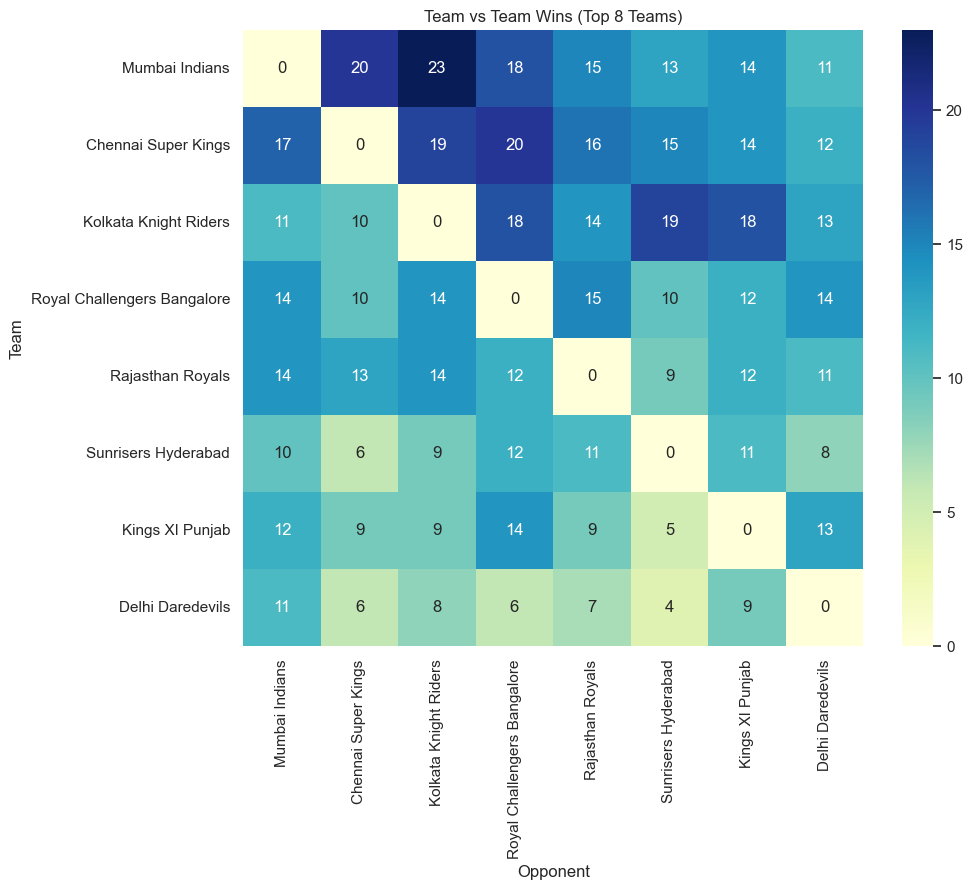

In [ ]:

# pivot table for team vs team wins
team_vs_team = matches.pivot_table(
    index='team1',
    columns='team2',
    values='winner',
    aggfunc=lambda x: (x == x.name).sum(),
    fill_value=0
)

# Since matches can have team1 and team2 swapped, sum both directions
teams = np.unique(matches[['team1', 'team2']].values)
team_vs_team_full = pd.DataFrame(0, index=teams, columns=teams)

for t1 in teams:
    for t2 in teams:
        wins_t1_vs_t2 = matches[(matches['team1'] == t1) & (matches['team2'] == t2) & (matches['winner'] == t1)].shape[0]
        wins_t2_vs_t1 = matches[(matches['team1'] == t2) & (matches['team2'] == t1) & (matches['winner'] == t1)].shape[0]
        team_vs_team_full.loc[t1, t2] = wins_t1_vs_t2 + wins_t2_vs_t1

print("Team vs Team Win Matrix (number of times row team beat column team):")
display(team_vs_team_full.head())

# heatmap for top 8 teams (by total wins)
top_teams = matches['winner'].value_counts().head(8).index
plt.figure(figsize=(10,8))
sns.heatmap(team_vs_team_full.loc[top_teams, top_teams], annot=True, fmt="d", cmap="YlGnBu")
plt.title("Team vs Team Wins (Top 8 Teams)")
plt.xlabel("Opponent")
plt.ylabel("Team")
plt.show()

In [29]:
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


Highest Total Team Scores and Chases

Top 10 Highest Team Totals in IPL History:


,match_id,batting_team,season,team1,team2,venue,total_runs
2104,1426268,Sunrisers Hyderabad,2024,Sunrisers Hyderabad,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",287
2060,1422126,Sunrisers Hyderabad,2024,Sunrisers Hyderabad,Mumbai Indians,"Rajiv Gandhi International Stadium, Uppal, Hyd...",277
2076,1422134,Kolkata Knight Riders,2024,Kolkata Knight Riders,Delhi Capitals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,272
2114,1426273,Sunrisers Hyderabad,2024,Sunrisers Hyderabad,Delhi Capitals,"Arun Jaitley Stadium, Delhi",266
702,598027,Royal Challengers Bangalore,2013,Royal Challengers Bangalore,Pune Warriors,M Chinnaswamy Stadium,263
2128,1426280,Punjab Kings,2024,Kolkata Knight Riders,Punjab Kings,"Eden Gardens, Kolkata",262
2103,1426268,Royal Challengers Bengaluru,2024,Sunrisers Hyderabad,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",262
2127,1426280,Kolkata Knight Riders,2024,Kolkata Knight Riders,Punjab Kings,"Eden Gardens, Kolkata",261
1972,1359512,Lucknow Super Giants,2023,Lucknow Super Giants,Punjab Kings,"Punjab Cricket Association IS Bindra Stadium, ...",257
2129,1426281,Delhi Capitals,2024,Delhi Capitals,Mumbai Indians,"Arun Jaitley Stadium, Delhi",257


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\1986254156.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_totals['total_runs'], y=highest_totals['batting_team'] + " (" + highest_totals['season'].astype(str) + ")", palette="Reds_r")


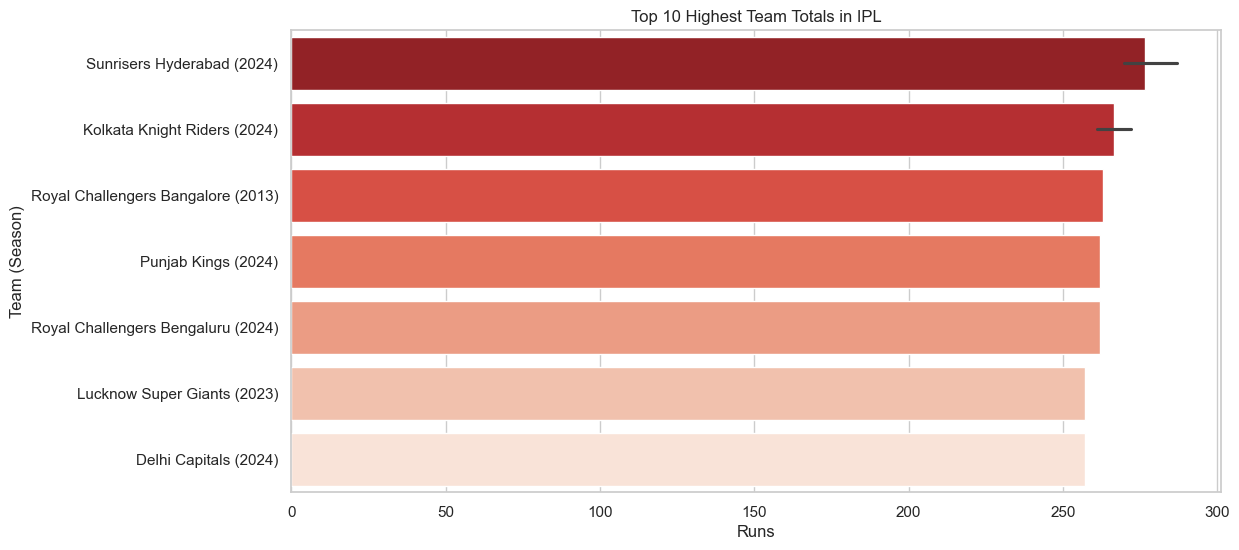


Top 10 Highest Successful Chases in IPL History:


,season,winner,second_innings_runs,team1,team2,first_innings_runs,venue
1065,2024,Punjab Kings,262.0,Kolkata Knight Riders,Punjab Kings,261,"Eden Gardens, Kolkata"
764,2021,Rajasthan Royals,226.0,Kings XI Punjab,Rajasthan Royals,223,Sharjah Cricket Stadium
1054,2024,Rajasthan Royals,224.0,Kolkata Knight Riders,Rajasthan Royals,223,"Eden Gardens, Kolkata"
626,2017,Kings XI Punjab,223.0,Mumbai Indians,Kings XI Punjab,230,Wankhede Stadium
842,2021,Mumbai Indians,219.0,Chennai Super Kings,Mumbai Indians,218,"Arun Jaitley Stadium, Delhi"
8,2008,Rajasthan Royals,217.0,Deccan Chargers,Rajasthan Royals,214,"Rajiv Gandhi International Stadium, Uppal"
1001,2023,Sunrisers Hyderabad,217.0,Rajasthan Royals,Sunrisers Hyderabad,214,"Sawai Mansingh Stadium, Jaipur"
995,2023,Mumbai Indians,216.0,Punjab Kings,Mumbai Indians,214,"Punjab Cricket Association IS Bindra Stadium, ..."
1090,2024,Sunrisers Hyderabad,215.0,Punjab Kings,Sunrisers Hyderabad,214,"Rajiv Gandhi International Stadium, Uppal, Hyd..."
991,2023,Mumbai Indians,214.0,Rajasthan Royals,Mumbai Indians,212,"Wankhede Stadium, Mumbai"


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\1986254156.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chasing_wins['second_innings_runs'], y=chasing_wins['winner'] + " (" + chasing_wins['season'].astype(str) + ")", palette="Greens_r")


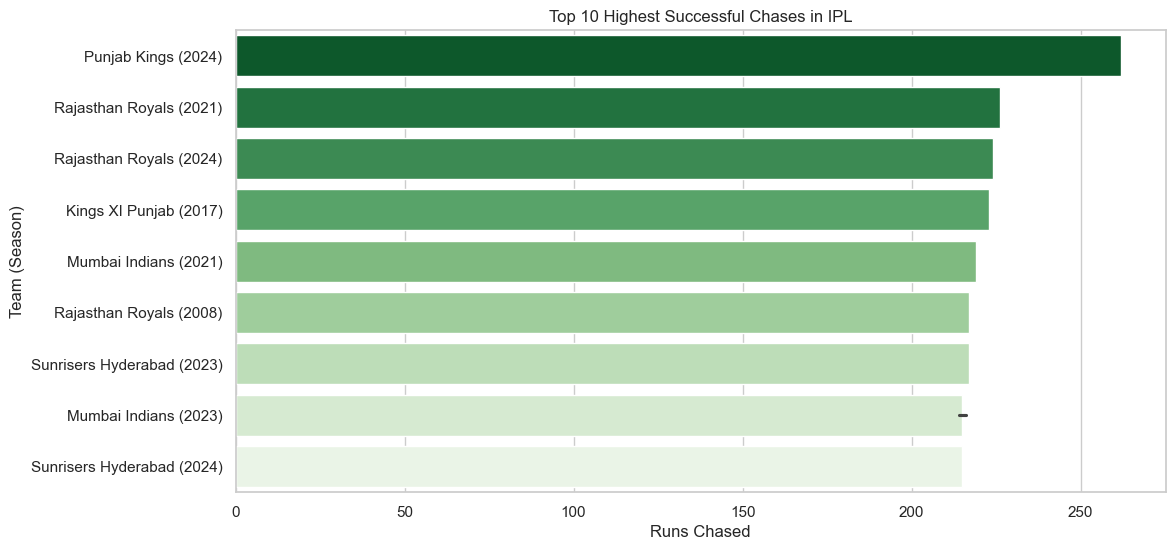

In [ ]:

# total runs scored by each team in each match (including extras)
team_totals = merged_df.groupby(['match_id', 'batting_team', 'season', 'team1', 'team2', 'venue'])['total_runs'].sum().reset_index()

# Highest totals by teams (top 10)
highest_totals = team_totals.sort_values('total_runs', ascending=False).head(10)
print("Top 10 Highest Team Totals in IPL History:")
display(highest_totals)

plt.figure(figsize=(12,6))
sns.barplot(x=highest_totals['total_runs'], y=highest_totals['batting_team'] + " (" + highest_totals['season'].astype(str) + ")", palette="Reds_r")
plt.xlabel("Runs")
plt.ylabel("Team (Season)")
plt.title("Top 10 Highest Team Totals in IPL")
plt.show()

# Highest Successful Chases

# Find the winner's total in each match
first_innings = merged_df[merged_df['inning'] == 1].groupby('match_id')['total_runs'].sum().reset_index(name='first_innings_runs')
second_innings = merged_df[merged_df['inning'] == 2].groupby('match_id')['total_runs'].sum().reset_index(name='second_innings_runs')

# Merge with matches to get winner and teams
chase_df = matches[['id', 'team1', 'team2', 'winner', 'season', 'venue']].merge(first_innings, left_on='id', right_on='match_id', how='left')
chase_df = chase_df.merge(second_innings, left_on='id', right_on='match_id', how='left', suffixes=('', '_2'))

# Filter matches where the chasing team (team batting second) won
chasing_wins = chase_df[chase_df['winner'] == chase_df['team2']].copy()
chasing_wins = chasing_wins.sort_values('second_innings_runs', ascending=False).head(10)

print("\nTop 10 Highest Successful Chases in IPL History:")
display(chasing_wins[['season', 'winner', 'second_innings_runs', 'team1', 'team2', 'first_innings_runs', 'venue']])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=chasing_wins['second_innings_runs'], y=chasing_wins['winner'] + " (" + chasing_wins['season'].astype(str) + ")", palette="Greens_r")
plt.xlabel("Runs Chased")
plt.ylabel("Team (Season)")
plt.title("Top 10 Highest Successful Chases in IPL")
plt.show()

Analyze Player Performance individually

In [ ]:


# 1. Most Runs in IPL (Till Date)
most_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
print("Top 10 Run Scorers in IPL (All Time):")
display(most_runs.head(10))

# 2. Most Fours and Sixes (Till Date)
most_fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batter').size().sort_values(ascending=False)
most_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batter').size().sort_values(ascending=False)
print("Top 10 Fours Hit (All Time):")
display(most_fours.head(10))
print("Top 10 Sixes Hit (All Time):")
display(most_sixes.head(10))

# 3. Most Fifties and Centuries
batsman_match_runs = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()

# Fifties (50-99 runs in a match)
fifties = batsman_match_runs[(batsman_match_runs['batsman_runs'] >= 50) & (batsman_match_runs['batsman_runs'] < 100)]
most_fifties = fifties.groupby('batter').size().sort_values(ascending=False)
print("Top 10 Fifties (All Time):")
display(most_fifties.head(10))

# Centuries (100+ runs in a match)
centuries = batsman_match_runs[batsman_match_runs['batsman_runs'] >= 100]
most_centuries = centuries.groupby('batter').size().sort_values(ascending=False)
print("Top 10 Centuries (All Time):")
display(most_centuries.head(10))

# 4. Highest Strike Rate (min 500 balls faced)
balls_faced = deliveries.groupby('batter').size()
total_runs = deliveries.groupby('batter')['batsman_runs'].sum()
strike_rate = (total_runs / balls_faced) * 100
strike_rate = strike_rate[balls_faced >= 500].sort_values(ascending=False)
print("Top 10 Strike Rates (min 500 balls faced):")
display(strike_rate.head(10))

# Year-wise Analysis
# Add season info to deliveries
deliveries_season = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

def yearwise_top(df, group_col, value_col, top_n=5):
    return df.groupby(['season', group_col])[value_col].sum().reset_index().sort_values(['season', value_col], ascending=[True, False]).groupby('season').head(top_n)

# Most Runs Year-wise
yearwise_runs = yearwise_top(deliveries_season, 'batter', 'batsman_runs', top_n=5)
print("Top 5 Run Scorers Each Season:")
display(yearwise_runs)

# Most Fours Year-wise
yearwise_fours = deliveries_season[deliveries_season['batsman_runs'] == 4]
yearwise_fours = yearwise_top(yearwise_fours, 'batter', 'batsman_runs', top_n=5)
print("Top 5 Fours Hit Each Season:")
display(yearwise_fours)

# Most Sixes Year-wise
yearwise_sixes = deliveries_season[deliveries_season['batsman_runs'] == 6]
yearwise_sixes = yearwise_top(yearwise_sixes, 'batter', 'batsman_runs', top_n=5)
print("Top 5 Sixes Hit Each Season:")
display(yearwise_sixes)

# Most Fifties Year-wise
batsman_match_runs_season = deliveries_season.groupby(['season', 'batter', 'match_id'])['batsman_runs'].sum().reset_index()
fifties_season = batsman_match_runs_season[(batsman_match_runs_season['batsman_runs'] >= 50) & (batsman_match_runs_season['batsman_runs'] < 100)]
yearwise_fifties = fifties_season.groupby(['season', 'batter']).size().reset_index(name='fifties').sort_values(['season', 'fifties'], ascending=[True, False]).groupby('season').head(5)
print("Top 5 Fifties Each Season:")
display(yearwise_fifties)

# Most Centuries Year-wise
centuries_season = batsman_match_runs_season[batsman_match_runs_season['batsman_runs'] >= 100]
yearwise_centuries = centuries_season.groupby(['season', 'batter']).size().reset_index(name='centuries').sort_values(['season', 'centuries'], ascending=[True, False]).groupby('season').head(5)
print("Top 5 Centuries Each Season:")
display(yearwise_centuries)

# Highest Strike Rate Year-wise (min 100 balls faced in season)
balls_faced_season = deliveries_season.groupby(['season', 'batter']).size().reset_index(name='balls')
runs_season = deliveries_season.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index(name='runs')
sr_season = balls_faced_season.merge(runs_season, on=['season', 'batter'])
sr_season['strike_rate'] = (sr_season['runs'] / sr_season['balls']) * 100
sr_season = sr_season[sr_season['balls'] >= 100]
yearwise_sr = sr_season.sort_values(['season', 'strike_rate'], ascending=[True, False]).groupby('season').head(5)
print("Top 5 Strike Rates Each Season (min 100 balls):")
display(yearwise_sr[['season', 'batter', 'strike_rate', 'balls']])

Top 10 Run Scorers in IPL (All Time):


batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

Top 10 Fours Hit (All Time):


batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
dtype: int64

Top 10 Sixes Hit (All Time):


batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
dtype: int64

Top 10 Fifties (All Time):


batter
DA Warner         62
V Kohli           56
S Dhawan          51
RG Sharma         43
AB de Villiers    41
SK Raina          39
F du Plessis      37
KL Rahul          37
G Gambhir         36
CH Gayle          32
dtype: int64

Top 10 Centuries (All Time):


batter
V Kohli           8
JC Buttler        7
CH Gayle          6
DA Warner         4
KL Rahul          4
Shubman Gill      4
SR Watson         4
SV Samson         3
AB de Villiers    3
JM Bairstow       2
dtype: int64

Top 10 Strike Rates (min 500 balls faced):


batter
AD Russell         164.224422
H Klaasen          161.990212
SP Narine          155.894309
N Pooran           154.768154
LS Livingstone     154.187192
GJ Maxwell         150.488599
RM Patidar         149.625468
Abhishek Sharma    148.864865
V Sehwag           148.827059
AB de Villiers     148.580442
dtype: float64

Top 5 Run Scorers Each Season:


,season,batter,batsman_runs
115,2008,SE Marsh,616
39,2008,G Gambhir,534
126,2008,ST Jayasuriya,514
124,2008,SR Watson,472
40,2008,GC Smith,441
...,...,...,...
2503,2024,V Kohli,741
2456,2024,RD Gaikwad,583
2447,2024,R Parag,573
2498,2024,TM Head,567


Top 5 Fours Hit Each Season:


,season,batter,batsman_runs
28,2008,G Gambhir,272
89,2008,SE Marsh,236
99,2008,ST Jayasuriya,228
29,2008,GC Smith,216
7,2008,AC Gilchrist,204
...,...,...,...
1883,2024,TM Head,256
1886,2024,V Kohli,248
1847,2024,RD Gaikwad,232
1891,2024,YBK Jaiswal,216


Top 5 Sixes Hit Each Season:


,season,batter,batsman_runs
80,2008,ST Jayasuriya,186
70,2008,SE Marsh,156
94,2008,YK Pathan,150
88,2008,V Sehwag,126
3,2008,AC Gilchrist,114
...,...,...,...
1457,2024,Abhishek Sharma,252
1477,2024,H Klaasen,228
1561,2024,V Kohli,228
1506,2024,N Pooran,216


Top 5 Fifties Each Season:


,season,batter,fifties
3,2008,G Gambhir,5
25,2008,SE Marsh,5
8,2008,KC Sangakkara,4
19,2008,RG Sharma,4
21,2008,S Dhawan,4
...,...,...,...
722,2024,RM Patidar,5
731,2024,SV Samson,5
738,2024,V Kohli,5
700,2024,F du Plessis,4


Top 5 Centuries Each Season:


,season,batter,centuries
0,2008,A Symonds,1
1,2008,AC Gilchrist,1
2,2008,BB McCullum,1
3,2008,MEK Hussey,1
4,2008,SE Marsh,1
...,...,...,...
74,2024,JC Buttler,2
73,2024,B Sai Sudharsan,1
75,2024,JM Bairstow,1
76,2024,MP Stoinis,1


Top 5 Strike Rates Each Season (min 100 balls):


,season,batter,strike_rate,balls
139,2008,V Sehwag,177.292576,229
149,2008,YK Pathan,171.936759,253
70,2008,MEK Hussey,168.000000,100
152,2008,Yuvraj Singh,156.544503,191
55,2008,KC Sangakkara,154.589372,207
...,...,...,...,...
2393,2024,J Fraser-McGurk,220.000000,150
2356,2024,Abhishek Sharma,195.161290,248
2495,2024,T Stubbs,185.294118,204
2498,2024,TM Head,184.690554,307


In [ ]:
# Batsman vs Teams
batsman_vs_team = deliveries.groupby(['batter', 'bowling_team'])['batsman_runs'].sum().reset_index()
top_batsman_vs_team = batsman_vs_team.sort_values('batsman_runs', ascending=False).head(10)
print("Top 10 Batsman vs Team Run Scorers:")
display(top_batsman_vs_team)

# Bowler vs Teams

valid_wickets = deliveries[deliveries['dismissal_kind'].isin([
    'bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'
])]
bowler_vs_team = valid_wickets.groupby(['bowler', 'batting_team'])['is_wicket'].sum().reset_index()
top_bowler_vs_team = bowler_vs_team.sort_values('is_wicket', ascending=False).head(10)
print("Top 10 Bowler vs Team Wicket Takers:")
display(top_bowler_vs_team)

# Most Catches in a Season
caught_deliveries = deliveries[deliveries['dismissal_kind'].isin(['caught', 'caught and bowled'])]
# Merge with matches to get season info
caught_deliveries_season = caught_deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')
# Exclude 'caught and bowled' for fielder analysis
caught_only = caught_deliveries_season[caught_deliveries_season['dismissal_kind'] == 'caught']
most_catches_season = caught_only.groupby(['season', 'fielder']).size().reset_index(name='catches').sort_values(['season', 'catches'], ascending=[True, False])
print("Most Catches in Each Season (Top 5 per season):")
display(most_catches_season.groupby('season').head(5))

# Who caught whom: Most Catches by Fielder off Batsman (Top 10 pairs)
caught_pairs = caught_only.groupby(['fielder', 'player_dismissed']).size().reset_index(name='catches').sort_values('catches', ascending=False).head(10)
print("Top 10 Fielder-Batsman Caught Pairs:")
display(caught_pairs)

Top 10 Batsman vs Team Run Scorers:


,batter,bowling_team,batsman_runs
908,DA Warner,Kolkata Knight Riders,1093
3136,RG Sharma,Kolkata Knight Riders,1070
3362,S Dhawan,Chennai Super Kings,1057
4130,V Kohli,Chennai Super Kings,1053
4138,V Kohli,Kolkata Knight Riders,962
1837,KL Rahul,Mumbai Indians,954
3370,S Dhawan,Kolkata Knight Riders,907
906,DA Warner,Kings XI Punjab,906
3372,S Dhawan,Mumbai Indians,901
3129,RG Sharma,Chennai Super Kings,896


Top 10 Bowler vs Team Wicket Takers:


,bowler,batting_team,is_wicket
569,DJ Bravo,Mumbai Indians,33
1506,MM Sharma,Mumbai Indians,33
332,B Kumar,Kolkata Knight Riders,32
2241,SL Malinga,Chennai Super Kings,31
40,A Mishra,Rajasthan Royals,31
2525,UT Yadav,Kings XI Punjab,29
2668,YS Chahal,Kolkata Knight Riders,29
2670,YS Chahal,Mumbai Indians,29
2299,SP Narine,Kings XI Punjab,28
2676,YS Chahal,Sunrisers Hyderabad,28


Most Catches in Each Season (Top 5 per season):


,season,fielder,catches
97,2008,SK Raina,10
125,2008,YV Takawale,10
57,2008,M Rawat,9
86,2008,RV Uthappa,9
52,2008,M Kaif,8
...,...,...,...
2034,2024,KL Rahul,15
2027,2024,JM Sharma,13
2074,2024,PD Salt,12
1989,2024,AR Patel,11


Top 10 Fielder-Batsman Caught Pairs:


,fielder,player_dismissed,catches
3915,MS Dhoni,RG Sharma,7
6188,SV Samson,CH Gayle,6
158,AB de Villiers,AT Rayudu,5
2792,KD Karthik,RV Uthappa,5
1269,DA Warner,RV Uthappa,5
5795,SK Raina,YK Pathan,5
5582,SA Yadav,AM Rahane,5
5746,SK Raina,KA Pollard,5
6199,SV Samson,Ishan Kishan,5
450,AM Rahane,KD Karthik,4


Comparison between batsman and bowlers

Top 5 Batsmen (All Time):


batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64

C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\395072504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_batsmen.values, y=top5_batsmen.index, palette="crest")


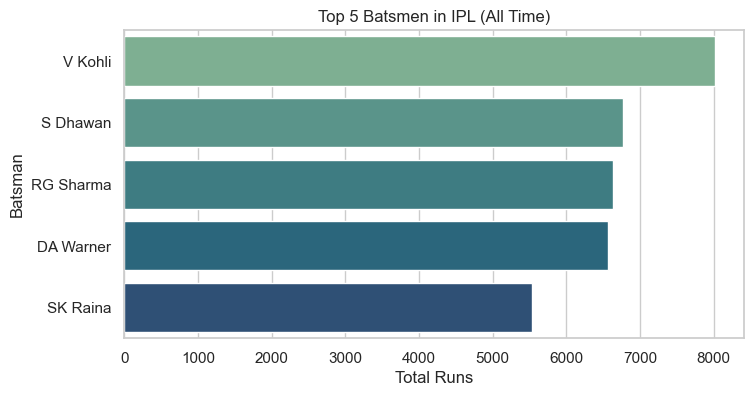

Top 5 Bowlers (All Time):


bowler
YS Chahal    205
PP Chawla    192
DJ Bravo     183
B Kumar      181
R Ashwin     180
Name: is_wicket, dtype: int64

C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14956\395072504.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_bowlers.values, y=top5_bowlers.index, palette="flare")


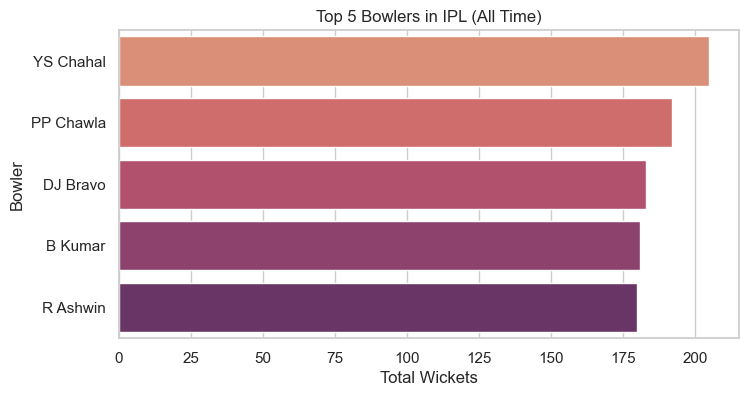

In [33]:
# Top 5 Batsman Comparison (All Time)
top5_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5)
print("Top 5 Batsmen (All Time):")
display(top5_batsmen)

plt.figure(figsize=(8,4))
sns.barplot(x=top5_batsmen.values, y=top5_batsmen.index, palette="crest")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 5 Batsmen in IPL (All Time)")
plt.show()

# Top 5 Bowler Comparison (All Time)
valid_wickets = deliveries[deliveries['dismissal_kind'].isin([
    'bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'
])]
top5_bowlers = valid_wickets.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(5)
print("Top 5 Bowlers (All Time):")
display(top5_bowlers)

plt.figure(figsize=(8,4))
sns.barplot(x=top5_bowlers.values, y=top5_bowlers.index, palette="flare")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 5 Bowlers in IPL (All Time)")
plt.show()